Creating plots for BPA exposed gene sets vs concentration

0.0005
1. HALLMARK_G2M_CHECKPOINT 1.79
2. HALLMARK_E2F_TARGETS 1.62
3. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.62
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.62
5. HALLMARK_SPERMATOGENESIS 1.43
6. HALLMARK_MITOTIC_SPINDLE 1.41

0.001
1. HALLMARK_G2M_CHECKPOINT 2.90
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.89
3. HALLMARK_E2F_TARGETS 2.89
4. HALLMARK_ESTROGEN_RESPONSE_LATE 2.85
5. HALLMARK_MITOTIC_SPINDLE 2.27
6. HALLMARK_SPERMATOGENESIS 2.14

0.01
1. HALLMARK_E2F_TARGETS 2.78
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 2.75
3. HALLMARK_G2M_CHECKPOINT 2.65
4. HALLMARK_ESTROGEN_RESPONSE_LATE 2.50
5. HALLMARK_MITOTIC_SPINDLE 2.16
6. HALLMARK_SPERMATOGENESIS 2.01

0.1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.88
2. HALLMARK_G2M_CHECKPOINT 1.67
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.65
4. HALLMARK_MITOTIC_SPINDLE (16) 1.16 --
5. HALLMARK_SPERMATOGENESIS (12) 1.26 --
6. HALLMARK_E2F_TARGETS 1.47

0.5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.87
2. HALLMARK_SPERMATOGENESIS 1.86
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.85
4. HALLMARK_G2M_CHECKPOINT 1.84
5. HALLMARK_MITOTIC_SPINDLE 1.83
6. HALLMARK_E2F_TARGETS 1.74

1
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 3.05
2. HALLMARK_ESTROGEN_RESPONSE_LATE 2.89
3. HALLMARK_E2F_TARGETS 2.89
4. HALLMARK_G2M_CHECKPOINT 2.84
5. HALLMARK_MITOTIC_SPINDLE 2.26
6. HALLMARK_SPERMATOGENESIS 1.96

5
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.92
2. HALLMARK_G2M_CHECKPOINT 1.90
3. HALLMARK_ESTROGEN_RESPONSE_LATE 1.88
4. HALLMARK_MITOTIC_SPINDLE 1.84
5. HALLMARK_SPERMATOGENESIS 1.84
6. HALLMARK_E2F_TARGETS 1.78

10
1. HALLMARK_G2M_CHECKPOINT 2.03
2. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.98
3. HALLMARK_E2F_TARGETS 1.95
4. HALLMARK_ESTROGEN_RESPONSE_LATE 1.92
5. HALLMARK_SPERMATOGENESIS 1.86
6. HALLMARK_MITOTIC_SPINDLE 1.81

50
1. HALLMARK_ESTROGEN_RESPONSE_EARLY 1.91
2. HALLMARK_ESTROGEN_RESPONSE_LATE 1.88
3. HALLMARK_G2M_CHECKPOINT 1.83
4. HALLMARK_E2F_TARGETS 1.76
5. HALLMARK_MITOTIC_SPINDLE 1.76
6. HALLMARK_SPERMATOGENESIS 1.61

100
1. HALLMARK_ESTROGEN_RESPONSE_EARLY -1.68
2. HALLMARK_ESTROGEN_RESPONSE_LATE (4) -1.49
3. HALLMARK_G2M_CHECKPOINT (5) -1.38
4. HALLMARK_MITOTIC_SPINDLE (6) -1.37
5. HALLMARK_E2F_TARGETS (7) -1.35
6. HALLMARK_SPERMATOGENESIS (8) -1.33


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "/content/topPathwaysInBPA.txt"
data = []
current_concentration = None
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        try:
            concentration = float(parts[0])
            current_concentration = concentration
        except ValueError:
            hallmark = parts[0]
            score = float(parts[1])
            data.append([current_concentration, hallmark, score])
df = pd.DataFrame(data, columns=["Concentration", "Hallmark", "Score"])
df_pivot = df.pivot(index="Concentration", columns="Hallmark", values="Score")

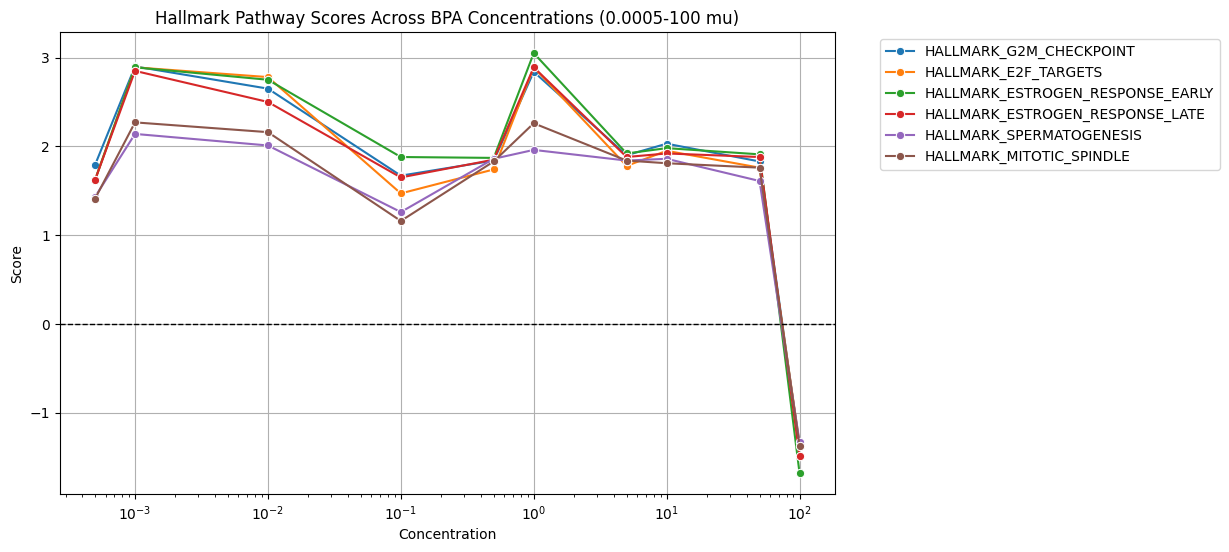

In [ ]:
df = pd.DataFrame(data, columns=["Concentration", "Hallmark", "Score"])
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Concentration", y="Score", hue="Hallmark", marker="o")

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.xscale("log")
plt.xlabel("Concentration")
plt.ylabel("Score")
plt.title("Hallmark Pathway Scores Across BPA Concentrations (0.0005-100 mu)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


This graph shows the number of differentiall expressed genes vs concentration of BPS exposed samples
0.0005:520
0.001: 738
0.01:512
0.5:366
0.1:651
1:1240
5:1483
10:1210
50:1849
100:3662

<Axes: xlabel='Concentration', ylabel='Genes'>

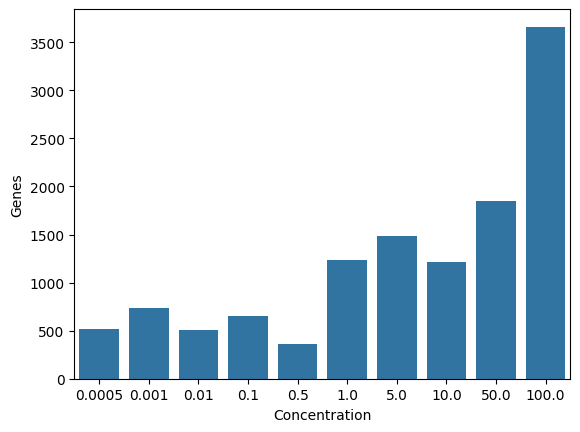

In [ ]:
import pandas as pd
import seaborn as sns
a = {0.0005:520,0.001: 738,0.01:512,0.5:366,0.1:651,1:1240,5:1483,10:1210,50:1849,100:3662}
df = pd.DataFrame(list(a.items()), columns=["Concentration", "Genes"])
sns.barplot(data = df, x="Concentration", y = "Genes")